## Importing Libraries
We import essential libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), and machine learning (scikit-learn). These will help us preprocess data, train models, and visualize results.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

## Loading Dataset and Preprocessing
We load the Breast Cancer Wisconsin dataset from a .csv file. We assign column names, drop the non-informative ID column, and encode the target variable "Diagnosis" as 1 for Malignant (M) and 0 for Benign (B).


In [2]:
# Load dataset
df = pd.read_csv("wdbc.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
df.drop('ID', axis=1, inplace=True)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

In [4]:
df.head()

,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Correlation Heatmap
We visualize the correlation between numerical features using a heatmap. This helps identify which features are strongly related, which could be important for model performance and feature selection.


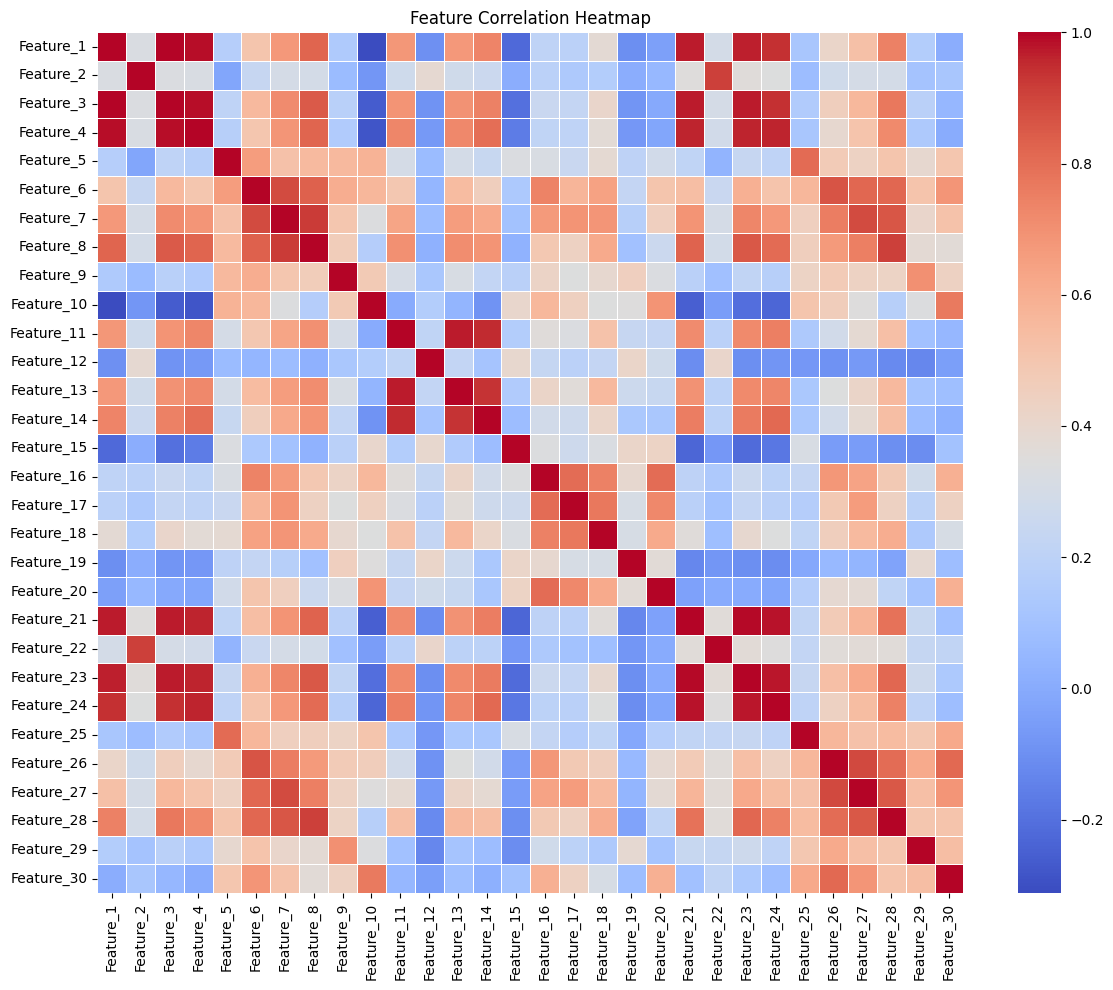

In [5]:
# Exploratory: Correlation heatmap
plt.figure(figsize=(12, 10))
corr = df.drop('Diagnosis', axis=1).corr()
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

## Pairplot for Exploratory Analysis
We plot a pairplot of a few selected features colored by the diagnosis. This gives us a visual understanding of how well the features separate the two classes (Benign and Malignant).


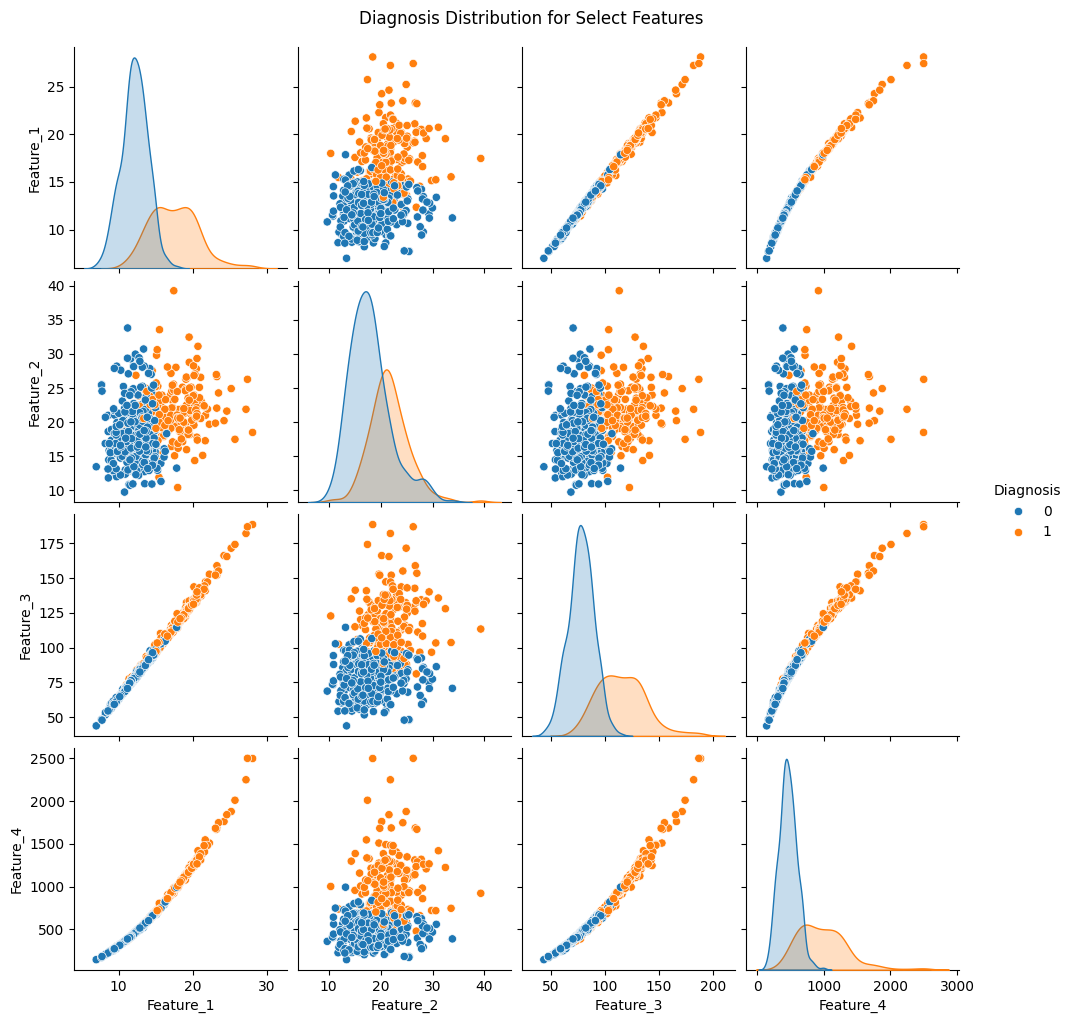

In [6]:
# Pairplot of a few features
sns.pairplot(df[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Diagnosis']],
             hue='Diagnosis', diag_kind='kde')
plt.suptitle("Diagnosis Distribution for Select Features", y=1.02)
plt.show()

## Feature Scaling and Splitting the Data
We standardize the features using "StandardScaler" to ensure all features have a similar scale. Then, we split the dataset into training and test sets while maintaining class balance using stratification.


In [7]:
# Preprocessing
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## Model Training
We initialize and train three models: Logistic Regression (Subtopic 1), Decision Tree, and Random Forest (Subtopic 2). Each model is trained on the scaled training data.

In [9]:
# Models
log_model = LogisticRegression(max_iter=10000, random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [10]:
log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Predictions and Metric Calculation
We generate predictions for each model and calculate key evaluation metrics: Accuracy, Precision, Recall, and F1 Score. These metrics help us understand the performance of each classifier.

In [11]:
y_pred_log = log_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [12]:
# Evaluation function with table
def model_metrics(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

## Tabular Comparison of Model Metrics
We compile the evaluation metrics into a pandas DataFrame for a side-by-side comparison of the three models performance.

Accuracy measures the proportion of total correct predictions. It is useful when classes are balanced.

Precision indicates how many predicted positives are truly positive, which is vital when false positives are costly.

Recall (or sensitivity) shows how many actual positives were correctly identified, important in medical diagnoses.

F1 Score is the harmonic mean of precision and recall, balancing the two when there’s a trade-off.


In [13]:
results = pd.DataFrame([
    model_metrics("Logistic Regression", y_test, y_pred_log),
    model_metrics("Decision Tree", y_test, y_pred_tree),
    model_metrics("Random Forest", y_test, y_pred_rf)
])

In [14]:
print("\n Model Comparison Table:\n")
print(results)


 Model Comparison Table:

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.964912   0.975000  0.928571  0.951220
1        Decision Tree  0.929825   0.904762  0.904762  0.904762
2        Random Forest  0.973684   1.000000  0.928571  0.962963


## Bar Plot of Model Performance
This bar plot visually compares all models across the four main evaluation metrics. It helps us quickly see which model performs best overall and on specific metrics.


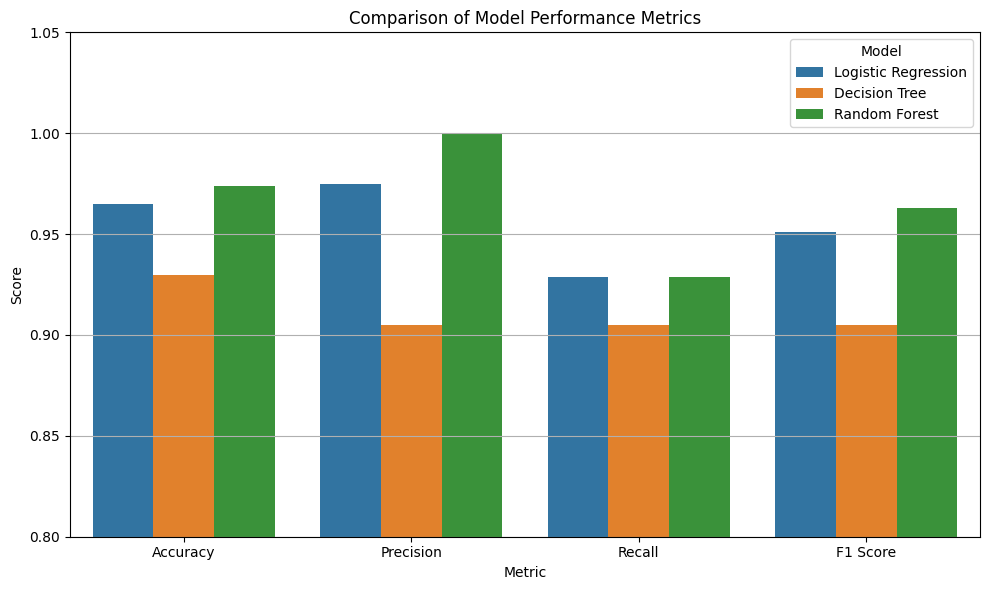

In [15]:
# Bar chart of model comparison
results_melted = results.melt(id_vars="Model", var_name="Metric", value_name="Score")
plt.figure(figsize=(10, 6))
sns.barplot(data=results_melted, x="Metric", y="Score", hue="Model")
plt.title("Comparison of Model Performance Metrics")
plt.ylim(0.8, 1.05)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Confusion Matrix for Each Model
Confusion matrices are plotted for all three models. They show the count of True Positives, False Positives, True Negatives, and False Negatives, which provide insight into model errors.


In [16]:
# Confusion matrices
models = {
    "Logistic Regression": y_pred_log,
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_rf
}

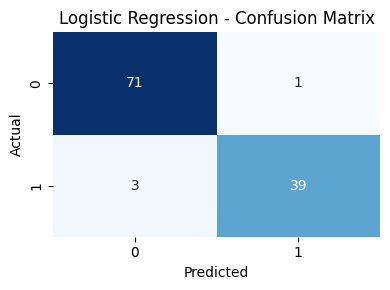

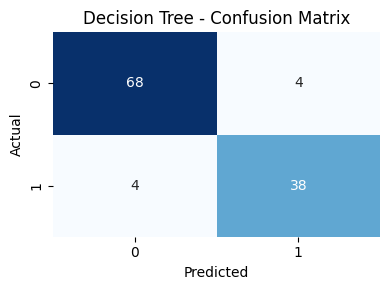

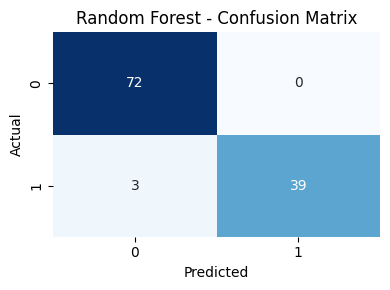

In [17]:
for name, preds in models.items():
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

## ROC Curve Comparison
The ROC curve visualizes the trade-off between the true positive rate and the false positive rate for different thresholds. A model with a curve closer to the top-left is generally better. We compare the ROC curves of all three models.


In [18]:
# ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_model.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

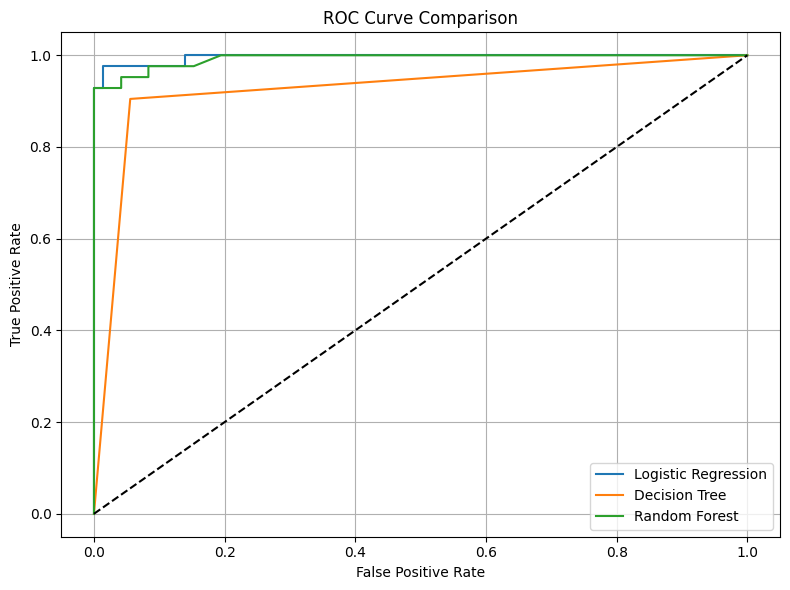

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_tree, tpr_tree, label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [20]:
print("Logistic Regression Predictions:\n", y_pred_log)
print("Decision Tree Predictions:\n", y_pred_tree)
print("Random Forest Predictions:\n", y_pred_rf)


Logistic Regression Predictions:
 [0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0
 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 1]
Decision Tree Predictions:
 [0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0
 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1]
Random Forest Predictions:
 [0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1]
